### Import all the required packages

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#Load the data set and create the data frame 

In [9]:
from sklearn import datasets
boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### MEDV is the dependant variable. i.e we are trying to predict the house prices in boston. Its a supervised regression problem.

In [15]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)
## Target is nothing but the house price in boston.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.

In [18]:
boston_df = pd.DataFrame(boston.data)

In [19]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
boston_df.shape

(506, 13)

In [21]:
boston_df.columns = boston.feature_names

In [22]:
#Create all the features of the data frame
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add the dependant variable 

In [23]:
boston_df["House Price"] = boston.target

In [24]:
boston_df.shape

(506, 14)

In [26]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Descriptive stats after adding features and label

In [27]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Correlation matrix

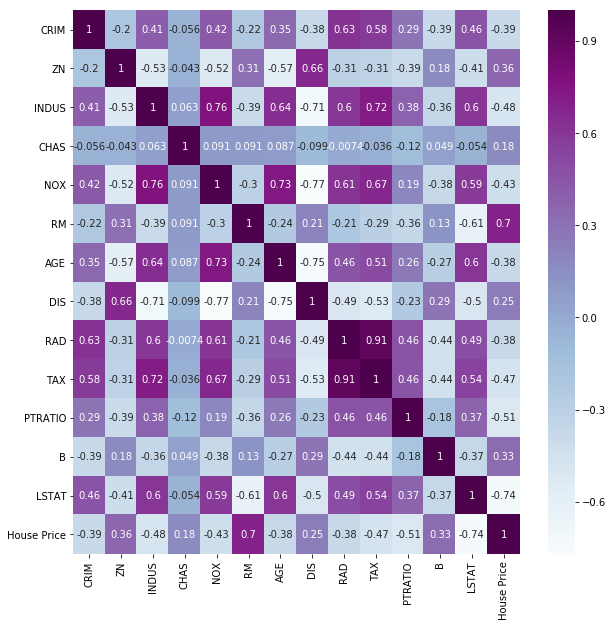

In [34]:
X = boston_df.corr()

#Plotting the correlation between the features
plt.subplots(figsize = (10,10))
sns.heatmap(X, cmap = "BuPu", annot = True)
plt.show()

#### Observations : House price is positively correlated with RM(No of rooms) and negatively correlated with LSTAT(Locality)

## Step 1 : Creat features and labels 

In [37]:
X = boston_df.drop("House Price", axis = 1)
Y = boston_df["House Price"]

print(X.head())
print(Y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House Price, dtype: float64


## Step 2 : Create the train and test data 

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size = 0.25, random_state = 1)


In [51]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
print(type(test_x))
print(type(test_y))

(379, 13)
(127, 13)
(379,)
(127,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Step 3 : Creating an instance of the model 

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 4 : Fit the model on the training data 

In [42]:
lm.fit(train_x, train_y)
# Here we are learning the behaviour between features and label

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5 : Prediction on the test data 

In [57]:
predict_test = lm.predict(test_x)
print(predict_test)
print(type(predict_test))
print(len(predict_test))

[32.37816533 27.95684437 18.07213891 21.63166556 18.93029508 19.96277202
 32.2834674  18.06715668 24.72989076 26.85359369 27.23326816 28.57021239
 21.18778302 26.94393815 23.37892579 20.89176865 17.11746934 37.73997945
 30.51980066  8.44489436 20.86557977 16.21989418 25.13605925 24.77658813
 31.40497629 11.02741407 13.82097563 16.80208261 35.94637198 14.7155729
 21.23939821 14.15079469 42.72492585 17.83887162 21.84610225 20.40178099
 17.50287927 27.00093206  9.80760408 20.00288662 24.27066782 21.06719021
 29.47089776 16.48482565 19.38852695 14.54778282 39.39838319 18.09810655
 26.22164983 20.60676525 25.09994066 24.48366723 25.02297948 26.84986898
  5.01517985 24.12809513 10.72843392 26.83178157 16.8023533  35.48142073
 19.50937911 27.43260347 16.58016763 19.151488   10.9990262  32.05016535
 36.32672849 21.8596379  24.8158357  25.32934192 23.36795453  6.98356201
 16.83774771 20.27043864 20.74890857 21.85918305 34.17775836 27.94673486
 24.86029952 34.43415796 18.61651831 24.02302532 34.

## Step 6 : Evaluate the model performance using some metrics 

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predict_test)

3.5748681261275412

In [ ]:
# This indicates that the predicted value deviates with a value of + or - 3.57 from the actual value.

### Data frame of features and its respective co-efficients

In [48]:
df_m = pd.DataFrame({"features" : X.columns, "coeff": lm.coef_})
df_m = df_m.sort_values(by = ["coeff"])
df_m

## We are creating a data frame with features and its co-efficients.
## y^ = b0 + b1X (b0 and b1 are the coefficients)

,features,coeff
4,NOX,-21.232624
7,DIS,-1.471583
10,PTRATIO,-0.996138
12,LSTAT,-0.557414
0,CRIM,-0.114429
9,TAX,-0.010675
11,B,0.006277
6,AGE,0.006911
2,INDUS,0.038300
1,ZN,0.057130


### Bar graph to show different feature importances

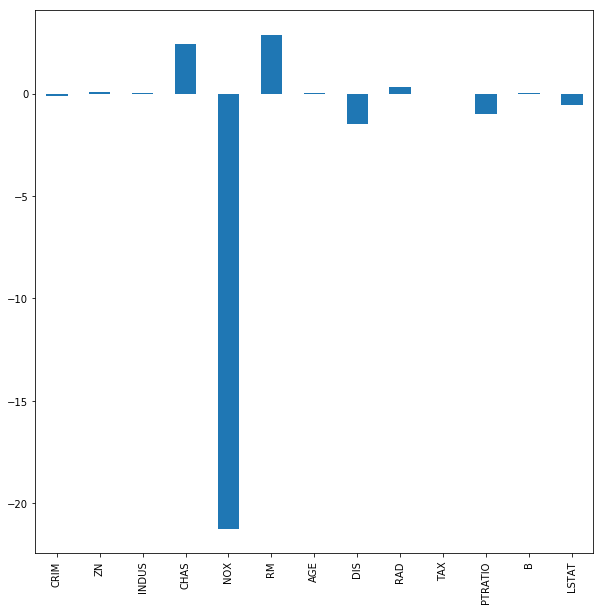

In [49]:
plt.figure(figsize=(10,10))
feature_importances = pd.Series(lm.coef_ , index = X.columns)
feature_importances.plot(kind = "bar")
plt.show()